## Deuxième problème : Prédiction du chef de famille

In [1]:
import pandas as pd
import re
import torch

data = pd.read_json('entities.json', orient = 'index')

In [2]:
data[0].iloc[0]

'ⓄBreton ⒻCyrille Ⓜmenuisier Ⓐ25 ⒸGarçon Ⓚfrançaise\nⓅFerazzi ⒻAuguste Ⓜvitrier Ⓐ30 ⒸGarçon ⓀPiémontaise\nⓅMachol ⒻPierre Ⓜvitrier Ⓐ24 ⒸGarçon ⓀPiémontaise\nⓅDesbois ⒻAlexandre Ⓜprop re Ⓐ48 ⒸHomme marié Ⓚfrançaise\nⓄVignat ⒻZélie Ⓜprop re Ⓗsa fe Ⓐ30 Ⓚfrançaise\nⓄHouy ⒻCaroline Ⓜdomestique Ⓐ24 ⒸFille Ⓚfrançaise\nⓄViolet ⒻEsther Ⓜfe de chambre Ⓐ24 ⒸFille Ⓚfrançaise\nⓅDesbroper ⒻFrançois Jules Ⓜaumônier du collège Ⓐ46 ⒸGarçon Ⓚfrançaise\nⓄApelmeau ⒻThérèse Ⓜdomestique Ⓐ49 ⒸFemme mariée Ⓚfrançaise\nⓅde Chaumont Ⓐ40 ⒸHomme marié Ⓚfrançaise\nⓄde Chaumont ⒻMathilde Ⓜprofess Ⓗsa fe Ⓐ30 ⒸFemme mariée Ⓚfrançaise\nⓄde Chaumont ⒻGeorges Ⓗle fils Ⓐ11 ⒸGarçon Ⓚfrançaise\nⓄde Chaumont ⒻHenro Ⓗle fils Ⓐ8 ⒸGarçon Ⓚfrançaise\nⓄde Chaumont ⒻGaston Ⓗle fils Ⓐ5 ⒸGarçon Ⓚfrançaise\nⓄVoisin ⒻAnne Ⓜdomestique Ⓐ24 ⒸFille Ⓚfrançaise\nⓅAllemant ⒻPhilippe Ⓜtailleur Ⓐ45 ⒸHomme marié Ⓚfrançaise\nⓄDutertre ⒻAdèle Ⓜouvrière Ⓗsa femme Ⓐ45 ⒸFemme mariée Ⓚfrançaise\nⓅGaucheron ⒻJoachim Florentin Ⓜpharmacien Ⓐ30 ⒸHomme m

In [3]:
data[0] = data[0].str.split('\n')
data = data.explode(0)

In [4]:
data

0
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...  ⓄBreton ⒻCyrille Ⓜmenuisier Ⓐ25 ⒸGarçon Ⓚfranç...
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...  ⓅFerazzi ⒻAuguste Ⓜvitrier Ⓐ30 ⒸGarçon ⓀPiémon...
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...  ⓅMachol ⒻPierre Ⓜvitrier Ⓐ24 ⒸGarçon ⓀPiémontaise
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...  ⓅDesbois ⒻAlexandre Ⓜprop re Ⓐ48 ⒸHomme marié ...
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...      ⓄVignat ⒻZélie Ⓜprop re Ⓗsa fe Ⓐ30 Ⓚfrançaise
...                                                                                               ...
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  ⓄBerni-Laureti ⒻAnnunziata Ⓗépouse Ⓑ1887 Ⓚidem...
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...              ⓄBerni ⒻPrimo Ⓗfils Ⓑ1914 Ⓚidem Ⓘidem
e8e27971-1678-4926-8b79-bfaa5746ae14/b44edb5a-0...                                                   
e8e27971-1678-4926-8b79-bfaa5746ae14/be386d7b-0...                                                   
e8e27971-1678-4926-8b79-bfaa5746ae14/f0fcf46e-a...                                                   

[25448 rows x 1 columns]

In [5]:
empty_rows = data[data[0]=='']
print(f'There is {len(empty_rows)} empty rows')

There is 367 empty rows


In [6]:
data = data[data[0] !=''].copy()

In [7]:
data

0
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...  ⓄBreton ⒻCyrille Ⓜmenuisier Ⓐ25 ⒸGarçon Ⓚfranç...
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...  ⓅFerazzi ⒻAuguste Ⓜvitrier Ⓐ30 ⒸGarçon ⓀPiémon...
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...  ⓅMachol ⒻPierre Ⓜvitrier Ⓐ24 ⒸGarçon ⓀPiémontaise
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...  ⓅDesbois ⒻAlexandre Ⓜprop re Ⓐ48 ⒸHomme marié ...
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...      ⓄVignat ⒻZélie Ⓜprop re Ⓗsa fe Ⓐ30 Ⓚfrançaise
...                                                                                               ...
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  ⓅChameton-Dideron ⒻMarie Ⓗchef Ⓑ1869 Ⓚidem ⒾPa...
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  ⓅOde ⒻMarie Ⓜouv chaus res Ⓗchef ⒺCara Ⓑ1863 Ⓚ...
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  ⓅBerni ⒻNello Ⓜmanoeuvre Ⓗchef ⒺBaretto Ⓑ1886 ...
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  ⓄBerni-Laureti ⒻAnnunziata Ⓗépouse Ⓑ1887 Ⓚidem...
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...              ⓄBerni ⒻPrimo Ⓗfils Ⓑ1914 Ⓚidem Ⓘidem

[25081 rows x 1 columns]

In [8]:
import numpy as np

tokens = {
'age': 'Ⓐ',
'birth_date': 'Ⓑ',
'civil_status':'Ⓒ',
'education_level':'Ⓓ',
'employer':'Ⓔ',
'firstname': 'Ⓕ',
'link': 'Ⓗ',
'lob': 'Ⓘ',
'maiden_name': 'Ⓙ',
'nationality': 'Ⓚ',
'observation': 'Ⓛ',
'occupation':'Ⓜ',
'surname': 'Ⓞ',
'surname_household': 'Ⓟ',
}


for token in tokens:
    data[token] = np.nan


regex_patterns = {token: re.compile(f"{re.escape(symbol)}([^{''.join(tokens.values())}]*)") for token, symbol in tokens.items()}

# Function to extract and populate token data using apply
def extract_tokens(row):
    text = row[0]
    for token, pattern in regex_patterns.items():
        match = pattern.search(text)
        if match:
            row[token] = match.group(1).strip()
    return row

# Apply the function to each row in the DataFrame
data = data.apply(extract_tokens, axis=1)

print(data)

                                                                                                    0  \
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...  ⓄBreton ⒻCyrille Ⓜmenuisier Ⓐ25 ⒸGarçon Ⓚfranç...   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...  ⓅFerazzi ⒻAuguste Ⓜvitrier Ⓐ30 ⒸGarçon ⓀPiémon...   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...  ⓅMachol ⒻPierre Ⓜvitrier Ⓐ24 ⒸGarçon ⓀPiémontaise   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...  ⓅDesbois ⒻAlexandre Ⓜprop re Ⓐ48 ⒸHomme marié ...   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...      ⓄVignat ⒻZélie Ⓜprop re Ⓗsa fe Ⓐ30 Ⓚfrançaise   
...                                                                                               ...   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  ⓅChameton-Dideron ⒻMarie Ⓗchef Ⓑ1869 Ⓚidem ⒾPa...   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  ⓅOde ⒻMarie Ⓜouv chaus res Ⓗchef ⒺCara Ⓑ1863 Ⓚ...   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  ⓅBe

In [9]:
data

0  \
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...  ⓄBreton ⒻCyrille Ⓜmenuisier Ⓐ25 ⒸGarçon Ⓚfranç...   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...  ⓅFerazzi ⒻAuguste Ⓜvitrier Ⓐ30 ⒸGarçon ⓀPiémon...   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...  ⓅMachol ⒻPierre Ⓜvitrier Ⓐ24 ⒸGarçon ⓀPiémontaise   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...  ⓅDesbois ⒻAlexandre Ⓜprop re Ⓐ48 ⒸHomme marié ...   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...      ⓄVignat ⒻZélie Ⓜprop re Ⓗsa fe Ⓐ30 Ⓚfrançaise   
...                                                                                               ...   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  ⓅChameton-Dideron ⒻMarie Ⓗchef Ⓑ1869 Ⓚidem ⒾPa...   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  ⓅOde ⒻMarie Ⓜouv chaus res Ⓗchef ⒺCara Ⓑ1863 Ⓚ...   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  ⓅBerni ⒻNello Ⓜmanoeuvre Ⓗchef ⒺBaretto Ⓑ1886 ...   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  ⓄBerni-Laureti ⒻAnnunziata Ⓗépouse Ⓑ1887 Ⓚidem...   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...              ⓄBerni ⒻPrimo Ⓗfils Ⓑ1914 Ⓚidem Ⓘidem   

                                                    age birth_date  \
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...   25        NaN   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...   30        NaN   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...   24        NaN   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...   48        NaN   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...   30        NaN   
...                                                 ...        ...   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  NaN       1869   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  NaN       1863   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  NaN       1886   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  NaN       1887   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  NaN       1914   

                                                   civil_status  \
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...       Garçon   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...       Garçon   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...       Garçon   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...  Homme marié   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...          NaN   
...                                                         ...   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...          NaN   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...          NaN   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...          NaN   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...          NaN   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...          NaN   

                                                    education_level employer  \
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...              NaN      NaN   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...              NaN      NaN   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...              NaN      NaN   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...              NaN      NaN   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...              NaN      NaN   
...                                                             ...      ...   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...              NaN      NaN   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...              NaN     Cara   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...              NaN  Baretto   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...              NaN      NaN   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...              NaN      NaN   

                                                     firstname    link  \
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...     Cyrille     NaN   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...     Auguste     NaN   
01c5e5bf-e

In [10]:
data[0].iloc[0]

'ⓄBreton ⒻCyrille Ⓜmenuisier Ⓐ25 ⒸGarçon Ⓚfrançaise'

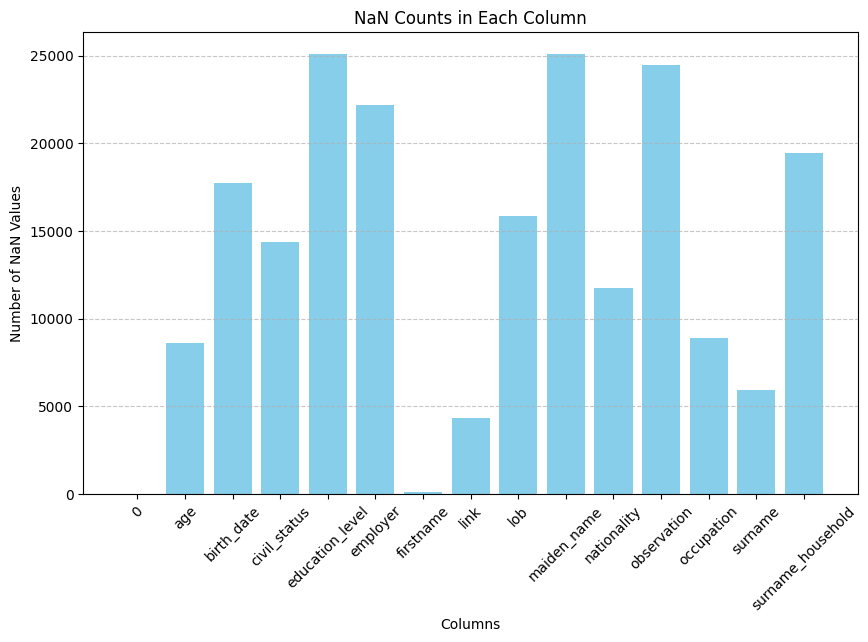

In [11]:
import matplotlib.pyplot as plt

nan_counts = data.isna().sum()

# Convert index to string if it's not already
nan_counts.index = nan_counts.index.map(str)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(nan_counts.index, nan_counts.values, color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Number of NaN Values')
plt.title('NaN Counts in Each Column')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [12]:
print(f"There are {data['surname'].isna().sum()} individuals without surname")
data[data['surname'].isna()]

There are 5922 individuals without surname


0  \
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...  ⓅFerazzi ⒻAuguste Ⓜvitrier Ⓐ30 ⒸGarçon ⓀPiémon...   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...  ⓅMachol ⒻPierre Ⓜvitrier Ⓐ24 ⒸGarçon ⓀPiémontaise   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...  ⓅDesbois ⒻAlexandre Ⓜprop re Ⓐ48 ⒸHomme marié ...   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...  ⓅDesbroper ⒻFrançois Jules Ⓜaumônier du collèg...   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...           Ⓟde Chaumont Ⓐ40 ⒸHomme marié Ⓚfrançaise   
...                                                                                               ...   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...          ⓅLambert ⒻRaymond Ⓗchef Ⓑ1856 Ⓚidem Ⓘidem   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  ⓅGiraud ⒻMarie Ⓗdomestique Ⓑ1861 Ⓚidem ⒾSt Michel   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  ⓅChameton-Dideron ⒻMarie Ⓗchef Ⓑ1869 Ⓚidem ⒾPa...   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  ⓅOde ⒻMarie Ⓜouv chaus res Ⓗchef ⒺCara Ⓑ1863 Ⓚ...   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  ⓅBerni ⒻNello Ⓜmanoeuvre Ⓗchef ⒺBaretto Ⓑ1886 ...   

                                                    age birth_date  \
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...   30        NaN   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...   24        NaN   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...   48        NaN   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...   46        NaN   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...   40        NaN   
...                                                 ...        ...   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  NaN       1856   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  NaN       1861   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  NaN       1869   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  NaN       1863   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  NaN       1886   

                                                   civil_status  \
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...       Garçon   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...       Garçon   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...  Homme marié   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...       Garçon   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...  Homme marié   
...                                                         ...   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...          NaN   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...          NaN   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...          NaN   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...          NaN   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...          NaN   

                                                    education_level employer  \
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...              NaN      NaN   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...              NaN      NaN   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...              NaN      NaN   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...              NaN      NaN   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...              NaN      NaN   
...                                                             ...      ...   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...              NaN      NaN   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...              NaN      NaN   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...              NaN      NaN   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...              NaN     Cara   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...              NaN  Baretto   

                                                         firstname  \
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...         Auguste   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...          Pierre   
01c5e5bf-ec54-4a65-a27

/tmp/ipykernel_173698/3100726032.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['surname'].fillna(data['surname_household'], inplace = True)


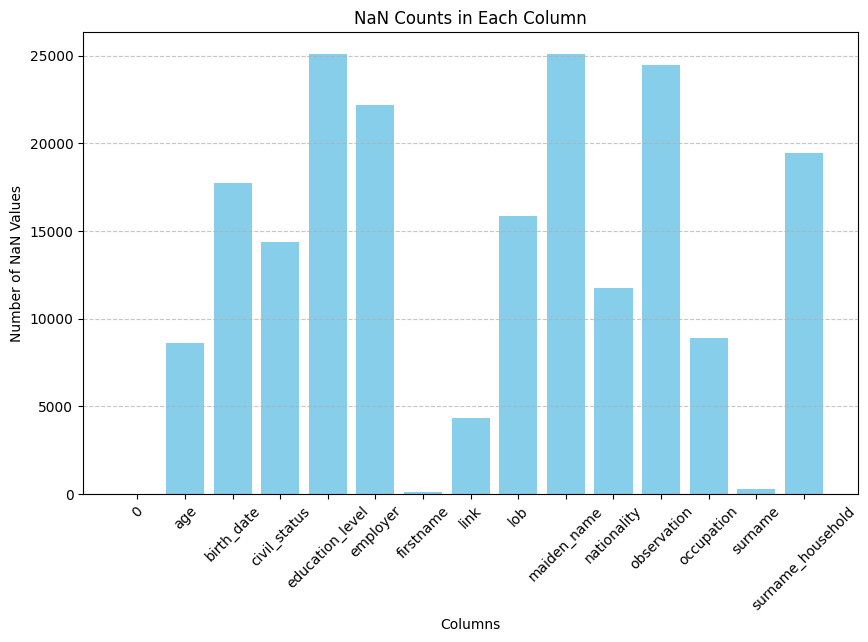

There are 282 individuals without surname


0  \
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/dacbdfc0-4...     ⒻEugène ⓂDomestique Ⓐ19 ⒸGarçon Ⓚfrancaise   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/dacbdfc0-4...  ⒻRose ⓂFemme de chambre Ⓐ27 ⒸFille Ⓚfrancaise   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/f7f0e70a-b...                 ⒻFassia Ⓜdomestique Ⓐ30 ⒸFille   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/f7f0e70a-b...                  ⒻMarie Ⓜdomestique Ⓐ31 ⒸFille   
35bee63f-2297-4b08-998c-34837d783483/1d214004-d...    ⒻMarie-Jeanne Ⓗfille Ⓑ1907 Ⓚfrançaise Ⓘidem   
...                                                                                           ...   
364a5d77-c908-45f4-a9e5-1f76ec48c33a/5eb16c11-6...                         ⒻMarie Ⓗidem Ⓐ6 ⒸFille   
364a5d77-c908-45f4-a9e5-1f76ec48c33a/5eb16c11-6...                ⒻFrançoise Ⓗidem Ⓐ8 mois ⒸFille   
364a5d77-c908-45f4-a9e5-1f76ec48c33a/5eb16c11-6...                    ⒻAlexandre Ⓗidem Ⓐ5 ⒸGarçon   
364a5d77-c908-45f4-a9e5-1f76ec48c33a/5eb16c11-6...                   ⒻMarie Ⓗleur fille Ⓐ2 ⒸFille   
364a5d77-c908-45f4-a9e5-1f76ec48c33a/5eb16c11-6...                        ⒻMarie Ⓗidem Ⓐ17 ⒸFille   

                                                       age birth_date  \
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/dacbdfc0-4...      19        NaN   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/dacbdfc0-4...      27        NaN   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/f7f0e70a-b...      30        NaN   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/f7f0e70a-b...      31        NaN   
35bee63f-2297-4b08-998c-34837d783483/1d214004-d...     NaN       1907   
...                                                    ...        ...   
364a5d77-c908-45f4-a9e5-1f76ec48c33a/5eb16c11-6...       6        NaN   
364a5d77-c908-45f4-a9e5-1f76ec48c33a/5eb16c11-6...  8 mois        NaN   
364a5d77-c908-45f4-a9e5-1f76ec48c33a/5eb16c11-6...       5        NaN   
364a5d77-c908-45f4-a9e5-1f76ec48c33a/5eb16c11-6...       2        NaN   
364a5d77-c908-45f4-a9e5-1f76ec48c33a/5eb16c11-6...      17        NaN   

                                                   civil_status  \
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/dacbdfc0-4...       Garçon   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/dacbdfc0-4...        Fille   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/f7f0e70a-b...        Fille   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/f7f0e70a-b...        Fille   
35bee63f-2297-4b08-998c-34837d783483/1d214004-d...          NaN   
...                                                         ...   
364a5d77-c908-45f4-a9e5-1f76ec48c33a/5eb16c11-6...        Fille   
364a5d77-c908-45f4-a9e5-1f76ec48c33a/5eb16c11-6...        Fille   
364a5d77-c908-45f4-a9e5-1f76ec48c33a/5eb16c11-6...       Garçon   
364a5d77-c908-45f4-a9e5-1f76ec48c33a/5eb16c11-6...        Fille   
364a5d77-c908-45f4-a9e5-1f76ec48c33a/5eb16c11-6...        Fille   

                                                    education_level employer  \
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/dacbdfc0-4...              NaN      NaN   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/dacbdfc0-4...              NaN      NaN   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/f7f0e70a-b...              NaN      NaN   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/f7f0e70a-b...              NaN      NaN   
35bee63f-2297-4b08-998c-34837d783483/1d214004-d...              NaN      NaN   
...                                                             ...      ...   
364a5d77-c908-45f4-a9e5-1f76ec48c33a/5eb16c11-6...              NaN      NaN   
364a5d77-c908-45f4-a9e5-1f76ec48c33a/5eb16c11-6...              NaN      NaN   
364a5d77-c908-45f4-a9e5-1f76ec48c33a/5eb16c11-6...              NaN      NaN   
364a5d77-c908-45f4-a9e5-1f76ec48c33a/5eb16c11-6...              NaN      NaN   
364a5d77-c908-45f4-a9e5-1f76ec48c33a/5eb16c11-6...              NaN      NaN   

                                                       firstname        link  \
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/dacbdfc0-4...        Eugène         NaN   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/dacbdfc0-4...          Rose         NaN   


In [13]:
data['surname'].fillna(data['surname_household'], inplace = True)

nan_counts = data.isna().sum()

# Convert index to string if it's not already
nan_counts.index = nan_counts.index.map(str)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(nan_counts.index, nan_counts.values, color='skyblue') 
plt.xlabel('Columns')
plt.ylabel('Number of NaN Values')
plt.title('NaN Counts in Each Column')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

print(f"There are {data['surname'].isna().sum()} individuals without surname")
data[data['surname'].isna()]

In [14]:

print(f"there are {len(data[data['surname'].notna()]['link'].unique())} different links in the dataset")
print(f"there is {len(data[data['surname'].notna()])} persons in the dataset")
links = data[data['surname'].notna()]['link'].value_counts()
print(links)

there are 937 different links in the dataset
there is 24799 persons in the dataset
link
chef                    3005
idem                    2105
sa femme                1972
fils                    1349
fille                   1273
                        ... 
petit gendre               1
arrière petite fille       1
sœur de Benoit             1
son frèrs                  1
leur belle mère            1
Name: count, Length: 936, dtype: int64


In [15]:
# We lower the characters for the columns we are going to use
columns_lower = ['civil_status', 'observation', 'occupation', 'link', 'nationality', 'employer']
for col in columns_lower :
    data[col] = data[col].str.lower()

In [16]:
# We fill the values where there is idem
for col in data:
    if 'idem' in data[col].values:
        data[col] = data[col].replace('idem', method='ffill')

/tmp/ipykernel_173698/950142211.py:4: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data[col] = data[col].replace('idem', method='ffill')


In [17]:
# For the individuals that have no surname we give them their household surname
data['surname'].fillna(data['surname_household'], inplace = True)
with_surname = data[data['surname'].notna()].copy()
print(f"there are {len(with_surname['link'].unique())} different links in the dataset")
print(f"there is {len(with_surname['link'])} persons in the dataset")
links = with_surname['link'].value_counts()
print(links)

there are 880 different links in the dataset
there is 24799 persons in the dataset
link
chef                       3131
sa femme                   2016
fils                       1553
fille                      1531
leur fils                  1158
                           ... 
chef de ménage et veuve       1
liénard                       1
son epouse                    1
ch d m                        1
etrang                        1
Name: count, Length: 879, dtype: int64


/tmp/ipykernel_173698/1744065271.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['surname'].fillna(data['surname_household'], inplace = True)


In [18]:
with_surname['civil_status'].value_counts(dropna = False)[:50]

civil_status
NaN             14168
garçon           2806
fille            2785
homme marié      2134
femme mariée     2104
veuve             512
veuf              290
Name: count, dtype: int64

There are to much variations of the link 'chef' so we regularized the chef links and have now only 2 cateogries : chef and not chef since we want only to predict if link = chef

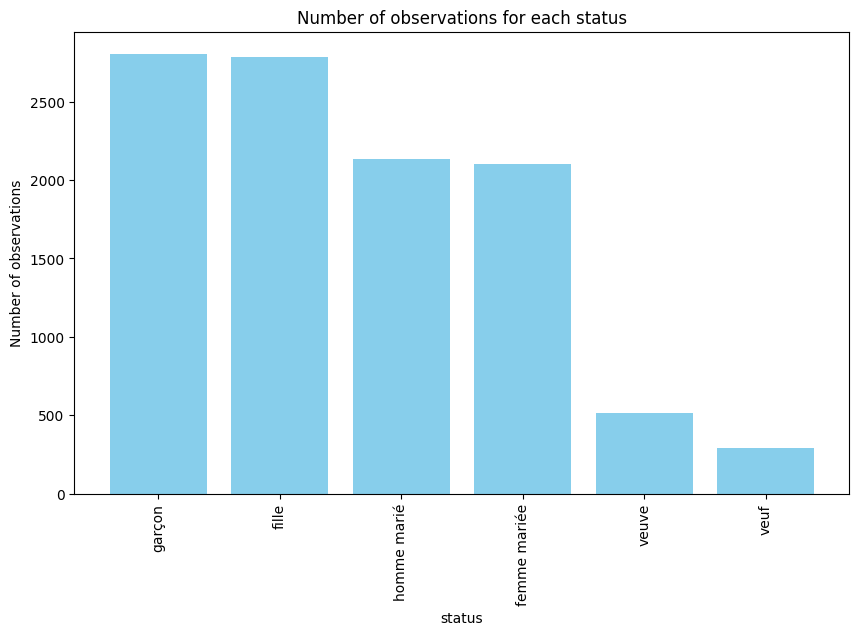

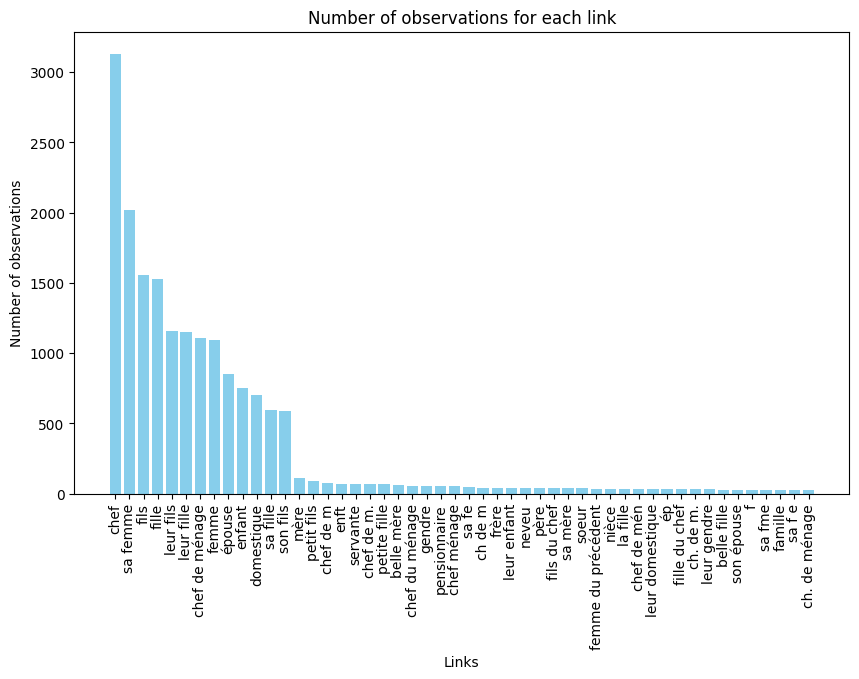

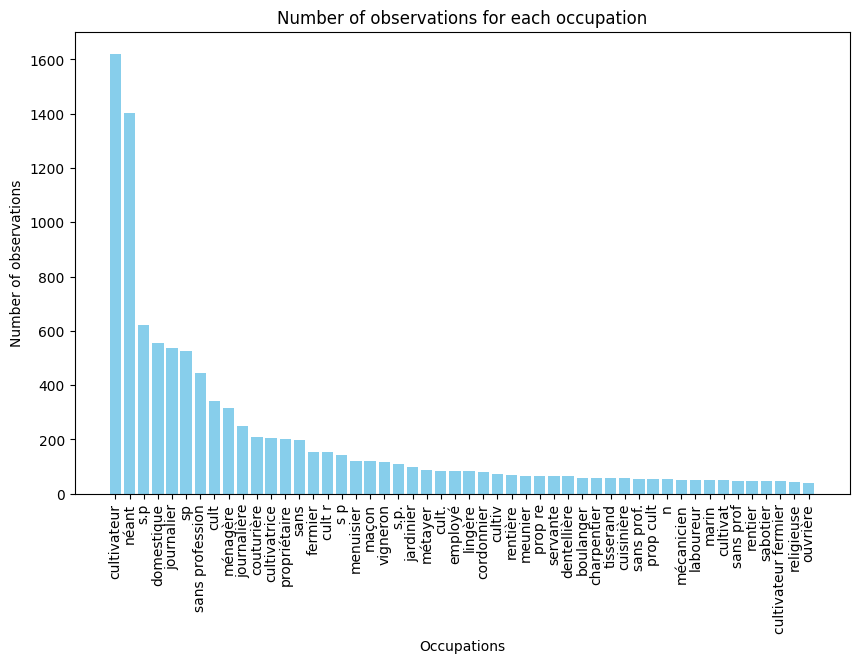

In [19]:
status = with_surname['civil_status'].value_counts()[:50]


# Plot
plt.figure(figsize=(10, 6)) 
plt.bar(status.index, status.values, color='skyblue')
plt.xlabel('status')
plt.ylabel('Number of observations')
plt.title('Number of observations for each status')
plt.xticks(rotation=90)

plt.show()


links = with_surname['link'].value_counts()[:50]


plt.figure(figsize=(10, 6))
plt.bar(links.index, links.values, color='skyblue')
plt.xlabel('Links')
plt.ylabel('Number of observations')
plt.title('Number of observations for each link')
plt.xticks(rotation=90)

plt.show()


occupations = with_surname['occupation'].value_counts()[:50]



plt.figure(figsize=(10, 6))
plt.bar(occupations.index, occupations.values, color='skyblue')
plt.xlabel('Occupations')
plt.ylabel('Number of observations')
plt.title('Number of observations for each occupation')
plt.xticks(rotation=90)

plt.show()

### Regex:

In [20]:
# The links
with_surname['link'] = with_surname['link'].str.replace(r'^(ch(ef)?).*$'
                                                        , 'chef', regex = True, flags=re.IGNORECASE)
links = with_surname['link'].value_counts()
print(links)
# The occupations
with_surname['occupation'] = with_surname['occupation'].str.replace(r'^(.*s(\s*\.?\s*p(rof|rofession)?\.?\s*|ans?\s*(p(rof|rofession)?\s*\.?))).*$', 'sans profession', regex = True, flags=re.IGNORECASE)
occupations = with_surname['occupation'].value_counts()
print(occupations)


#We give the link 'chef' to the individuals that are alone
# Count the occurrences of each surname within the same index
unknown_link = with_surname[with_surname['link'].isna()]
surname_counts = unknown_link.groupby([unknown_link.index, 'surname']).size()

# Filter the counts where the occurrence is 1, which means the surname is unique within the index
unique_surnames = surname_counts[surname_counts == 1].reset_index()['surname']

# Update the 'link' column to 'chef' where the surname is in the list of unique surnames
mask = with_surname['surname'].isin(unique_surnames) & with_surname['link'].isna()
with_surname.loc[mask, 'link'] = 'chef'

#with_surname['link'] = with_surname['link'].where(with_surname['link'] == 'chef', 'not chef')

link
chef                  4772
sa femme              2016
fils                  1553
fille                 1531
leur fils             1158
                      ... 
veuve bounoure           1
veuve bayle              1
do que                   1
adjointe                 1
enfant 1er mariage       1
Name: count, Length: 824, dtype: int64
occupation
sans profession          2278
cultivateur              1621
néant                    1401
domestique                555
journalier                537
                         ... 
lampiste                    1
directeur des continf       1
assistante                  1
caoutchouteur               1
quincaillère                1
Name: count, Length: 1795, dtype: int64


In [21]:
with_surname

0  \
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...  ⓄBreton ⒻCyrille Ⓜmenuisier Ⓐ25 ⒸGarçon Ⓚfranç...   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...  ⓅFerazzi ⒻAuguste Ⓜvitrier Ⓐ30 ⒸGarçon ⓀPiémon...   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...  ⓅMachol ⒻPierre Ⓜvitrier Ⓐ24 ⒸGarçon ⓀPiémontaise   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...  ⓅDesbois ⒻAlexandre Ⓜprop re Ⓐ48 ⒸHomme marié ...   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...      ⓄVignat ⒻZélie Ⓜprop re Ⓗsa fe Ⓐ30 Ⓚfrançaise   
...                                                                                               ...   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  ⓅChameton-Dideron ⒻMarie Ⓗchef Ⓑ1869 Ⓚidem ⒾPa...   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  ⓅOde ⒻMarie Ⓜouv chaus res Ⓗchef ⒺCara Ⓑ1863 Ⓚ...   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  ⓅBerni ⒻNello Ⓜmanoeuvre Ⓗchef ⒺBaretto Ⓑ1886 ...   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  ⓄBerni-Laureti ⒻAnnunziata Ⓗépouse Ⓑ1887 Ⓚidem...   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...              ⓄBerni ⒻPrimo Ⓗfils Ⓑ1914 Ⓚidem Ⓘidem   

                                                    age birth_date  \
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...   25        NaN   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...   30        NaN   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...   24        NaN   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...   48        NaN   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...   30        NaN   
...                                                 ...        ...   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  NaN       1869   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  NaN       1863   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  NaN       1886   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  NaN       1887   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  NaN       1914   

                                                   civil_status  \
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...       garçon   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...       garçon   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...       garçon   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...  homme marié   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...          NaN   
...                                                         ...   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...          NaN   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...          NaN   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...          NaN   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...          NaN   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...          NaN   

                                                    education_level employer  \
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...              NaN      NaN   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...              NaN      NaN   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...              NaN      NaN   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...              NaN      NaN   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...              NaN      NaN   
...                                                             ...      ...   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...              NaN      NaN   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...              NaN     cara   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...              NaN  baretto   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...              NaN      NaN   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...              NaN      NaN   

                                                     firstname    link  \
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...     Cyrille    chef   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...     Auguste    chef   
01c5e5bf-e

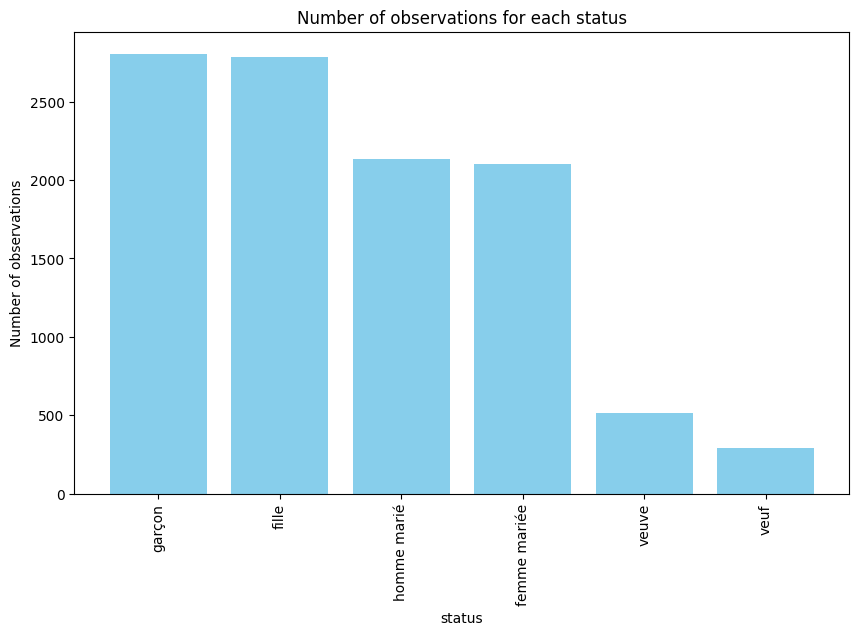

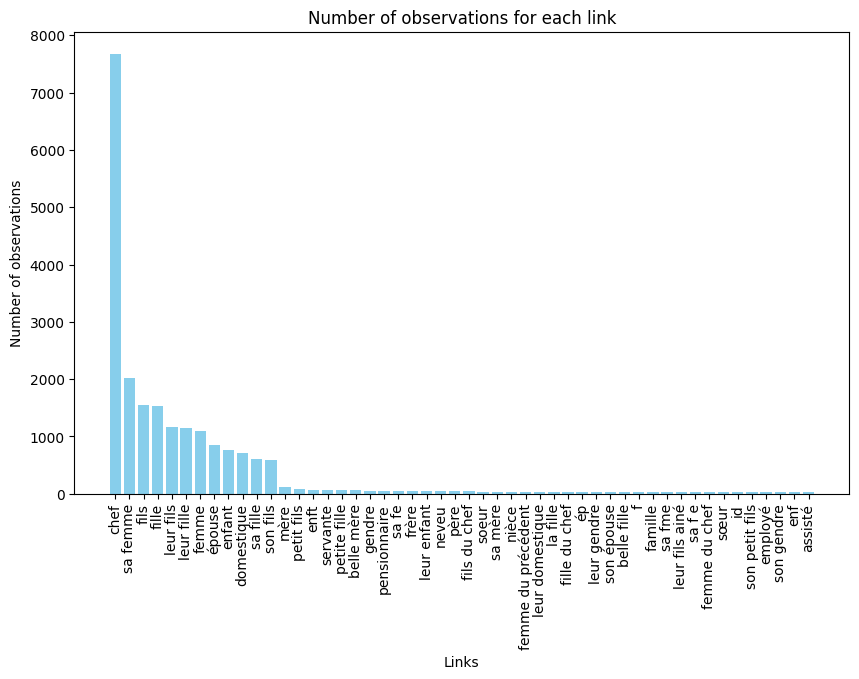

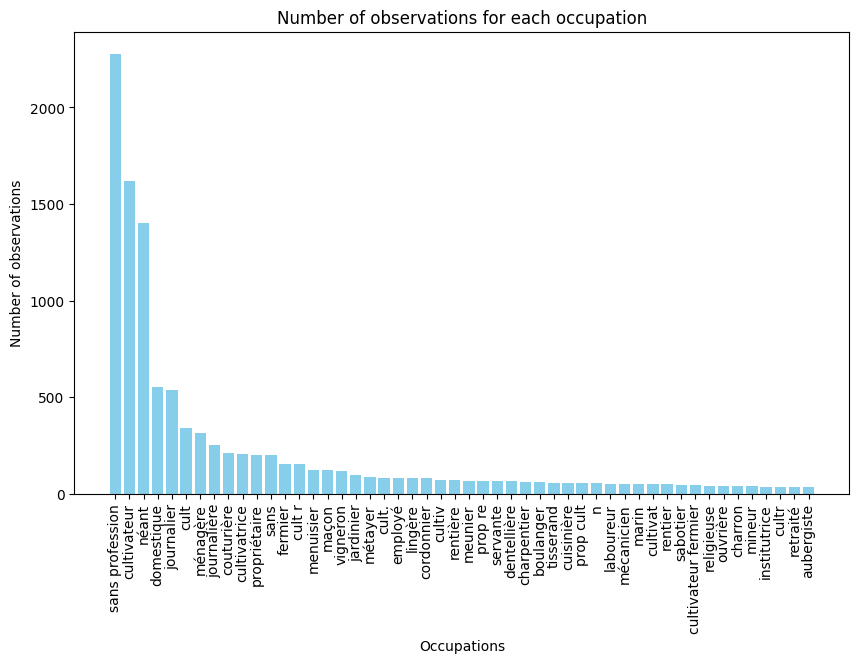

In [22]:
status = with_surname['civil_status'].value_counts()[:50]


# Plot
plt.figure(figsize=(10, 6)) 
plt.bar(status.index, status.values, color='skyblue')
plt.xlabel('status')
plt.ylabel('Number of observations')
plt.title('Number of observations for each status')
plt.xticks(rotation=90)

plt.show()


links = with_surname['link'].value_counts()[:50]


plt.figure(figsize=(10, 6))
plt.bar(links.index, links.values, color='skyblue')
plt.xlabel('Links')
plt.ylabel('Number of observations')
plt.title('Number of observations for each link')
plt.xticks(rotation=90)

plt.show()


occupations = with_surname['occupation'].value_counts()[:50]



plt.figure(figsize=(10, 6))
plt.bar(occupations.index, occupations.values, color='skyblue')
plt.xlabel('Occupations')
plt.ylabel('Number of observations')
plt.title('Number of observations for each occupation')
plt.xticks(rotation=90)

plt.show()

In [23]:

#We give the link to the individual that have no civil status as it can help to identify their status
mask = (with_surname['civil_status'].isna()) & (with_surname['link']!='chef')
# We replace the values with their links
with_surname.loc[mask, 'civil_status'] = with_surname.loc[mask, 'link']


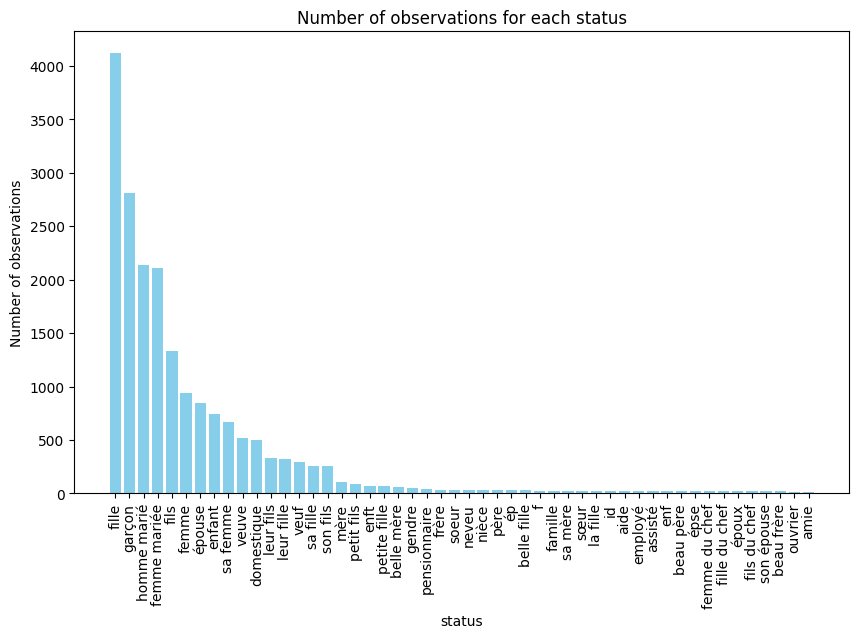

In [24]:
status = with_surname['civil_status'].value_counts()[:50]

plt.figure(figsize=(10, 6))
plt.bar(status.index, status.values, color='skyblue')
plt.xlabel('status')
plt.ylabel('Number of observations')
plt.title('Number of observations for each status')
plt.xticks(rotation=90)

plt.show()

In [25]:
status = with_surname['civil_status'].value_counts()
print(status)

civil_status
fille                          4114
garçon                         2806
homme marié                    2134
femme mariée                   2104
fils                           1330
                               ... 
soeur de la femme                 1
fils ainé du chef de ménage       1
fme du dernier                    1
son 2 fils                        1
sa 2e fille                       1
Name: count, Length: 438, dtype: int64


In [26]:
#garçon
with_surname['civil_status'] = with_surname['civil_status'].str.replace(r'^fils.*$', 'garçon', regex = True, flags=re.IGNORECASE)

# fille
with_surname['civil_status'] = with_surname['civil_status'].str.replace(r'^fille.*$', 'fille', regex = True, flags=re.IGNORECASE)

# homme marié
with_surname['civil_status'] = with_surname['civil_status'].str.replace(r'^époux.*$', 'homme marié ', regex = True, flags=re.IGNORECASE)
with_surname['civil_status'] = with_surname['civil_status'].str.replace(r'^mari.*$', 'homme marié ', regex = True, flags=re.IGNORECASE)

# femme mariée
with_surname['civil_status'] = with_surname['civil_status'].str.replace(r'^épouse.*$', 'femme mariée', regex = True, flags=re.IGNORECASE)
with_surname['civil_status'] = with_surname['civil_status'].str.replace(r'^femme.*$', 'femme mariée', regex = True, flags=re.IGNORECASE)

# veuve
with_surname['civil_status'] = with_surname['civil_status'].str.replace(r'^vve.*$', 'veuve', regex = True, flags=re.IGNORECASE)

status_to_keep = ['garçon', 'fille', 'homme marié', 'femme mariée', 'veuve', 'veuf']

# We set the values other than the original ones to 'non disponible'
with_surname.loc[~with_surname['civil_status'].isin(status_to_keep), 'civil_status'] = 'non disponible'
status = with_surname['civil_status'].value_counts()
print(status)



civil_status
non disponible    9549
garçon            4189
fille             4174
femme mariée      3943
homme marié       2134
veuve              519
veuf               291
Name: count, dtype: int64


In [27]:
with_surname['link'].value_counts()

link
chef                  7679
sa femme              2016
fils                  1553
fille                 1531
leur fils             1158
                      ... 
veuve bounoure           1
veuve bayle              1
do que                   1
adjointe                 1
enfant 1er mariage       1
Name: count, Length: 824, dtype: int64

In [28]:
# We split the links into 'chef' and 'not chef' since we only want to predict chef
with_surname['link'] = with_surname['link'].where(with_surname['link'] == 'chef', 'not chef')
with_surname['link'].value_counts()
# We ffill the household names in order to have the same household name for the women that don't have the same surname as their husband
with_surname['surname_household'] = with_surname['surname_household'].fillna(method = "ffill")

/tmp/ipykernel_173698/4043435516.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  with_surname['surname_household'] = with_surname['surname_household'].fillna(method = "ffill")


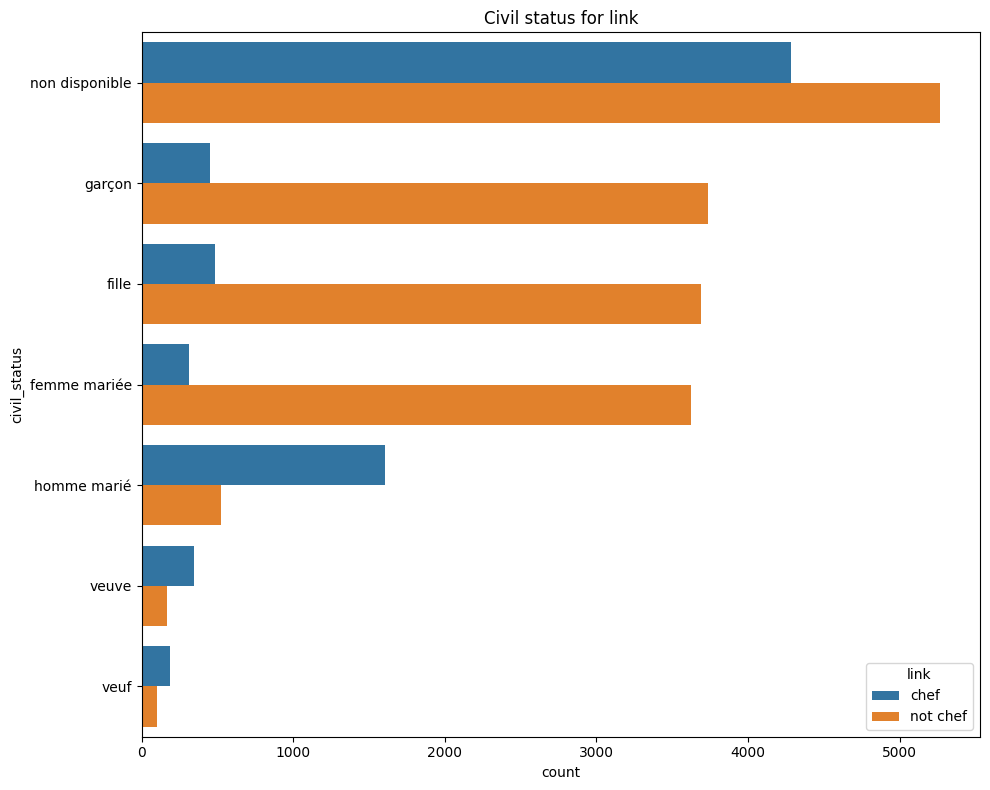

In [29]:
import numpy as np
import seaborn as sns


# categorical variables
top_civil_status = with_surname['civil_status'].value_counts().head(20).index

# the links
top_link = with_surname['link'].value_counts().index

# Filter the dataframe 
filtered_df = with_surname[with_surname['civil_status'].isin(top_civil_status) & with_surname['link'].isin(top_link)]

# Seabonr plot
plt.figure(figsize=(10,8))
sns.countplot(
    data=filtered_df,
    y='civil_status', 
    hue='link',
    order=filtered_df['civil_status'].value_counts().index 
)
plt.title('Civil status for link')
plt.tight_layout()
plt.show()

In [30]:
col_to_use = ['firstname', 'surname', 'surname_household', 'civil_status', 'link', 'observation', 'occupation']
final_data = with_surname[col_to_use]
final_data = final_data.fillna('non disponible')
final_data

firstname  \
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...     Cyrille   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...     Auguste   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...      Pierre   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...   Alexandre   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...       Zélie   
...                                                        ...   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...       Marie   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...       Marie   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...       Nello   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  Annunziata   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...       Primo   

                                                             surname  \
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...            Breton   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...           Ferazzi   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...            Machol   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...           Desbois   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...            Vignat   
...                                                              ...   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  Chameton-Dideron   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...               Ode   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...             Berni   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...     Berni-Laureti   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...             Berni   

                                                   surname_household  \
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...    non disponible   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...           Ferazzi   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...            Machol   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...           Desbois   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...           Desbois   
...                                                              ...   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  Chameton-Dideron   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...               Ode   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...             Berni   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...             Berni   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...             Berni   

                                                      civil_status      link  \
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...          garçon      chef   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...          garçon      chef   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...          garçon      chef   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...     homme marié      chef   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...  non disponible  not chef   
...                                                            ...       ...   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  non disponible      chef   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  non disponible      chef   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  non disponible      chef   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...    femme mariée  not chef   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...          garçon  not chef   

                                                       observation  \
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...  non disponible   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...  non disponible   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...  non disponible   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...  non disponible   
01c5e5bf-ec54-4a65-a27f-c179feb19e0e/02a4a658-e...  non disponible   
...                                                            ...   
e8e27971-1678-4926-8b79-bfaa5746ae14/9ce7f561-8...  non disponible   
e8e27971-

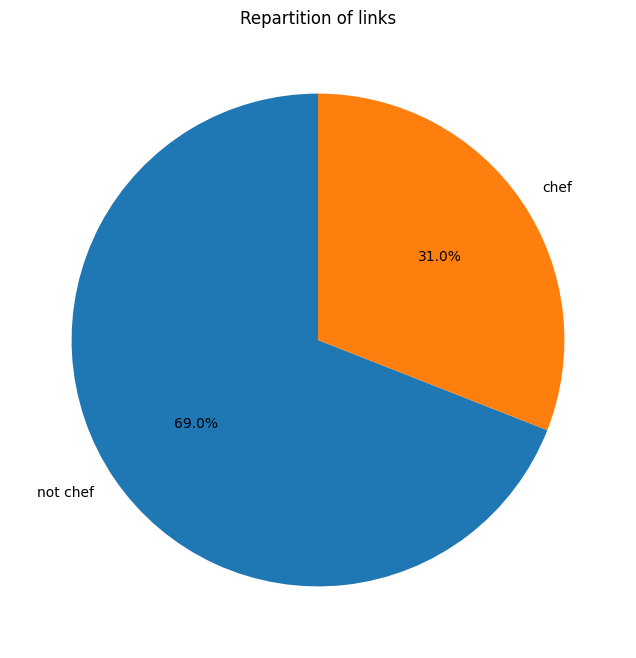

In [31]:
link_distribution = final_data['link'].value_counts(normalize=True)

# camember plot
plt.figure(figsize=(8, 8))
plt.pie(link_distribution, labels=link_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Repartition of links')
plt.show()

In [32]:


# Function to create description
def create_description(row, prev_row, next_row):
    desc = f"Je suis {row['firstname']} {row['surname']}, mon nom de foyer est {row['surname_household']}, " \
           f"mon statut civil est {row['civil_status']} et mon occupation est {row['occupation']}. "
    if prev_row is not None:
        desc = desc + f"La personne qui me précède est {prev_row['firstname']} {prev_row['surname']}, son nom de foyer est {prev_row['surname_household']}, " \
           f"son statut civil est {prev_row['civil_status']} et son occupation est {prev_row['occupation']}. "
    if next_row is not None:
        desc = desc + f"La personne qui me suit est {next_row['firstname']} {next_row['surname']}, son nom de foyer est {next_row['surname_household']}, " \
           f"son statut civil est {next_row['civil_status']} et son occupation est {next_row['occupation']}."
    return desc

# Create new column
final_data = final_data.reset_index(drop=False)
phrases = []
for i in final_data.index :
    prev_desc = None if i == 0 else final_data.iloc[i-1]
    next_desc = None if i == len(final_data) - 1 else final_data.iloc[i+1]
    phrases.append(create_description(final_data.iloc[i], prev_desc, next_desc))

final_data['description'] = phrases

# Baseline implementation

Since the data is from 19th century registers it could make sense that the husband is in most of cases the "chef". We are planning to predict that when the civil_status is "homme marié" the person is "chef"

In [33]:
test_data = final_data.copy()

preds = test_data['civil_status'].apply(lambda x: 1 if x == 'homme marié' else 0).values.tolist()
labels = test_data['link'].apply(lambda x: 1 if x == 'chef' else 0).values.tolist()

{'accuracy': 0.7339812089197145, 'f1': 0.3277285233873433}


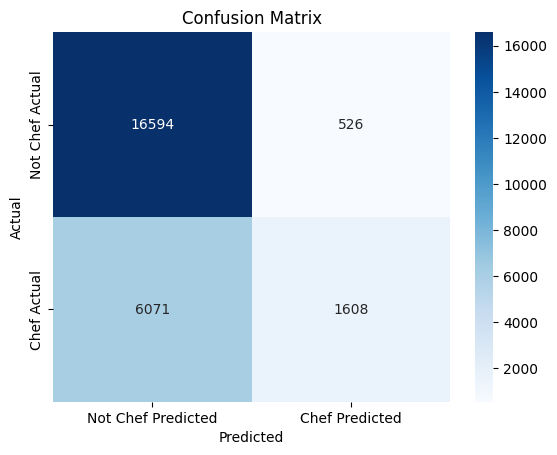

In [34]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns

#Function to compute the accuracy and the F1 score
def compute_metrics(preds, labels):
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1
    }

print(compute_metrics(preds, labels))

def plot_confusion_matrix(labels, preds): 
    # We plot a confusion matrix to see how are distributed the errors
    conf_matrix = confusion_matrix(labels, preds)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues",
                xticklabels=['Not Chef Predicted', 'Chef Predicted'],
                yticklabels=['Not Chef Actual', 'Chef Actual'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(labels, preds)

In [35]:
test_data = final_data.copy()

preds = test_data['civil_status'].apply(lambda x: 1 if x == 'homme marié' else 0).values.tolist()
labels = test_data['link'].apply(lambda x: 1 if x == 'chef' else 0).values.tolist()


# KMeans

In [36]:
from sklearn.model_selection import train_test_split

X = final_data[['firstname', 'surname', 'surname_household', 'civil_status', 'occupation']].copy()

#We concatenate the columns values to get a text
X = X.agg(' '.join, axis=1)

y = final_data['link'].apply(lambda x: 1 if x == 'chef' else 0).values.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


In [37]:
from sklearn.feature_extraction.text import CountVectorizer

# create the vectorizer object
vectorizer = CountVectorizer(max_features=1000) 
# fit on train data
vectorizer.fit(X_train)

# apply it on train and dev data
X_train_vec = vectorizer.transform(X_train)
X_valid_vec = vectorizer.transform(X_valid)
X_test_vec = vectorizer.transform(X_test)

In [38]:
from sklearn.naive_bayes import MultinomialNB
# train a Naive Bayes classifier
# create the MultinomialNB
clf = MultinomialNB()

# Train 
clf.fit(X_train_vec, y_train)
# Evaluate 
y_valid_pred = clf.predict(X_valid_vec)
y_test_pred = clf.predict(X_test_vec)

score_train = clf.score(X_train_vec, y_train)
score_valid = clf.score(X_valid_vec, y_valid)
score_test = clf.score(X_test_vec, y_test)

print("The score on the training set is : %s" %score_train)
print("The score on the validation set is : %s" %score_valid)
print("The score on the test set is : %s" %score_test)

The score on the training set is : 0.8066434800141136
The score on the validation set is : 0.7814516129032258
The score on the test set is : 0.8016129032258065


{'accuracy': 0.8016129032258065, 'f1': 0.6657608695652174}


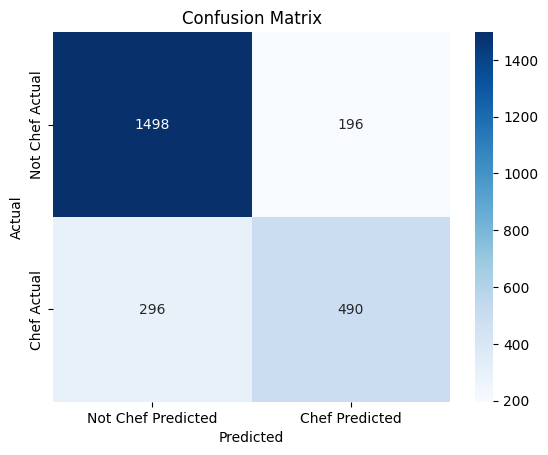

In [39]:
print(compute_metrics(y_test, y_test_pred))
plot_confusion_matrix(y_test, y_test_pred)

# CAMEMBERT

In [40]:
import transformers
from torch.utils.data import DataLoader
from transformers import Trainer, TrainingArguments
import torch

In [47]:
from transformers import CamembertTokenizer, CamembertForSequenceClassification



In [48]:
test_data = final_data.copy()
text = test_data['description'].tolist()
text


['Je suis Cyrille Breton, mon nom de foyer est non disponible, mon statut civil est garçon et mon occupation est menuisier. La personne qui me suit est Auguste Ferazzi, son nom de foyer est Ferazzi, son statut civil est garçon et son occupation est vitrier.',
 'Je suis Auguste Ferazzi, mon nom de foyer est Ferazzi, mon statut civil est garçon et mon occupation est vitrier. La personne qui me précède est Cyrille Breton, son nom de foyer est non disponible, son statut civil est garçon et son occupation est menuisier. La personne qui me suit est Pierre Machol, son nom de foyer est Machol, son statut civil est garçon et son occupation est vitrier.',
 'Je suis Pierre Machol, mon nom de foyer est Machol, mon statut civil est garçon et mon occupation est vitrier. La personne qui me précède est Auguste Ferazzi, son nom de foyer est Ferazzi, son statut civil est garçon et son occupation est vitrier. La personne qui me suit est Alexandre Desbois, son nom de foyer est Desbois, son statut civil es

In [49]:
labels = test_data['link']

# Convert the labels into encoding
label_mapping = {'not chef': 0, 'chef': 1}
labels = labels.map(label_mapping)
labels = torch.tensor(labels)

In [50]:
# Load the model that has been fine-tuned

model_path = "./camembert_model"
camembert_model = CamembertForSequenceClassification.from_pretrained(model_path)
tokenizer = CamembertTokenizer.from_pretrained(model_path)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [51]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.empty_cache()

print(f"Using device: {device}")
camembert_model = camembert_model.to(device)

Using device: cuda


In [52]:
def encode(text, tokenizer, max_length=512):
    # Encode the text using pretrained tokenizer and adding separators for the sentences
    encodings = tokenizer(text, add_special_tokens=True, 
                          max_length=max_length, padding='max_length', 
                          truncation=True, return_tensors="pt")
    return encodings
    
encodings = encode(text, tokenizer)

### If need to fine-tune

In [ ]:
"""

tokenizer = CamembertTokenizer.from_pretrained("camembert-base")
camembert_model = CamembertForSequenceClassification.from_pretrained("camembert-base", num_labels=2)

"""

In [44]:
"""
from sklearn.model_selection import train_test_split


input_ids_train, input_ids_test, attention_masks_train, attention_masks_test, labels_train, labels_test = train_test_split(
    encodings['input_ids'], encodings['attention_mask'], labels, test_size=0.2, random_state=42)
"""

In [45]:
"""
from sklearn.metrics import accuracy_score, f1_score

# PyTorch Dataset
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: tensor[idx] for key, tensor in self.encodings.items()}
        item['labels'] = torch.tensor([self.labels[idx]])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = Dataset({'input_ids': input_ids_train, 'attention_mask': attention_masks_train}, labels_train)
eval_dataset = Dataset({'input_ids': input_ids_test, 'attention_mask': attention_masks_test}, labels_test)

"""

In [47]:
"""
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
)

trainer = Trainer(
    model=camembert_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset
    )
"""

In [48]:
"""
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'
trainer.train()
"""

RuntimeError: [enforce fail at inline_container.cc:595] . unexpected pos 703775872 vs 703775760

In [52]:
"""
last_checkpoint = "./results/checkpoint-3500"

trainer.train(resume_from_checkpoint=last_checkpoint)
"""

TrainOutput(global_step=7440, training_loss=0.12686638678273848, metrics={'train_runtime': 3012.3068, 'train_samples_per_second': 19.758, 'train_steps_per_second': 2.47, 'total_flos': 1.565958068186112e+16, 'train_loss': 0.12686638678273848, 'epoch': 3.0})

In [53]:
"""
results = trainer.evaluate()
print(results)
"""

{'eval_loss': 0.2914426624774933, 'eval_runtime': 150.5555, 'eval_samples_per_second': 32.945, 'eval_steps_per_second': 4.118, 'epoch': 3.0}


In [55]:
"""
# Save
model_path = "./camembert_model"
camembert_model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)
"""

('./camembert_model/tokenizer_config.json',
 './camembert_model/special_tokens_map.json',
 './camembert_model/sentencepiece.bpe.model',
 './camembert_model/added_tokens.json')

In [53]:
camembert_model.eval()  # Set the model to evaluation mode


split = int(len(text) * 0.8)
new_texts = text[split:]
all_predictions = []

# We create batches
batch_size = 16  
for i in range(0, len(new_texts), batch_size):
    batch_texts = new_texts[i : i + batch_size]
    inputs = tokenizer(batch_texts, padding=True, truncation=True, max_length=512, return_tensors="pt")


    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Predict
    with torch.no_grad():
        outputs = camembert_model(**inputs)
        predictions = outputs.logits.argmax(-1)
        all_predictions.extend(predictions.tolist())

    # Manage memory
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

print(all_predictions)


[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 

{'accuracy': 0.9217741935483871, 'f1': 0.8641456582633054}


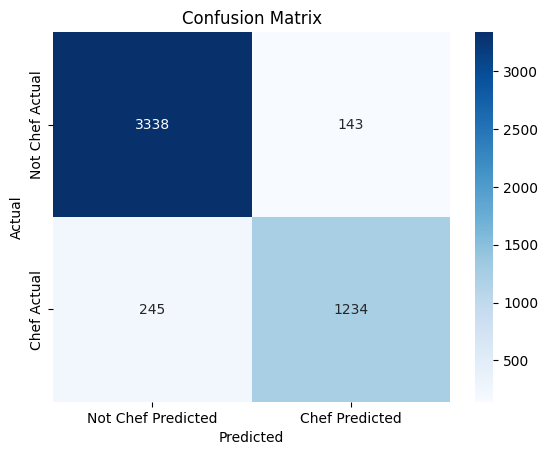

In [54]:
print(compute_metrics(y[split:], all_predictions))
plot_confusion_matrix(y[split:], all_predictions)

# LLAMA-2

Source : [text](https://huggingface.co/blog/llama2#using-transformers)

In [34]:
import transformers
from transformers import AutoTokenizer

model = "meta-llama/Llama-2-7b-chat-hf"

tokenizer = AutoTokenizer.from_pretrained(model)
pipeline = transformers.pipeline(
    "text-generation",
    model=model,
    torch_dtype=torch.float16,
    device_map="auto",
)



Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [35]:
test_data = final_data.copy()
text = test_data['description'].tolist()
split = int(len(text)*0.8)
text = text[split:]

### Need to run if the responses aren't already generated

In [41]:
"""
import pickle


answers = []

# Create size 20 batches
batch_size = 20
batches = [text[i:i+batch_size] for i in range(0, len(text), batch_size)]

# explore text
for batch_idx, batch_text in enumerate(batches):
    # Construire une liste de questions pour le lot de textes
    questions = [f"{txt} \nÀ partir de ce texte, répond à la question suivante : Suis-je le chef de foyer ?" for txt in batch_text]
    
    # Generate answers
    responses = pipeline(questions, max_length=512, num_return_sequences=1, truncation=True)
    
    # add answers
    answers.extend([response[0]["generated_text"] for response in responses])

    # Save the answers in pkl files 
    if (batch_idx + 1) % 5 == 0:  # Sauvegarder tous les 5 lots
        with open(f'answers_batch_{batch_idx+1}.pkl', 'wb') as f:
            pickle.dump(answers, f)
        print(f"{(batch_idx+1)*batch_size} predictions done")

# Save the complete answers file
with open('answers_final.pkl', 'wb') as f:
    pickle.dump(answers, f)
print("All predictions done")
"""


100 predictions done
200 predictions done
300 predictions done
400 predictions done
500 predictions done
600 predictions done
700 predictions done
800 predictions done
900 predictions done
1000 predictions done
1100 predictions done
1200 predictions done
1300 predictions done
1400 predictions done
1500 predictions done
1600 predictions done
1700 predictions done
1800 predictions done
1900 predictions done
2000 predictions done
2100 predictions done
2200 predictions done
2300 predictions done
2400 predictions done
2500 predictions done
2600 predictions done
2700 predictions done
2800 predictions done
2900 predictions done
3000 predictions done
3100 predictions done
3200 predictions done
3300 predictions done
3400 predictions done
3500 predictions done
3600 predictions done
3700 predictions done
3800 predictions done
3900 predictions done
4000 predictions done
4100 predictions done
4200 predictions done
4300 predictions done
4400 predictions done
4500 predictions done
4600 predictions do

In [56]:
import pickle

# Open the pickle file containing the answers
with open('answers_final.pkl', 'rb') as file:
    answers = pickle.load(file)

print(answers)

['Je suis Henriette Jousseaume, mon nom de foyer est Charneau, mon statut civil est femme mariée et mon occupation est non disponible. La personne qui me précède est Henri Charneau, son nom de foyer est Charneau, son statut civil est homme marié et son occupation est tisserand. La personne qui me suit est Henriette Arriné, son nom de foyer est Charneau, son statut civil est veuve et son occupation est non disponible. \nÀ partir de ce texte, répond à la question suivante : Suis-je le chef de foyer ?\n\nRéponse : Non, vous êtes Henriette Jousseaume, la femme de Henri Charneau. Le chef de foyer est Henri Charneau.', 'Je suis Henriette Arriné, mon nom de foyer est Charneau, mon statut civil est veuve et mon occupation est non disponible. La personne qui me précède est Henriette Jousseaume, son nom de foyer est Charneau, son statut civil est femme mariée et son occupation est non disponible. La personne qui me suit est Constant Pelon, son nom de foyer est Pelon, son statut civil est homme m

In [65]:
pos_words = ["Oui", "oui", "Yes", "yes", "êtes le chef"]

def extract_encode_answers(answers, pos_words):
    encoded_answers = []
    for answer in answers:
        # We are looking for the double return to line, where began the answer
        start = answer.find("\n\n")
        end = len(answer)
        rep = answer[start + 4:end]
        
        # Convert to 0 or 1
        rep = rep.strip()
        if any(word in rep for word in pos_words):
            encoded_answers.append(1)
        else:
            encoded_answers.append(0)
    return encoded_answers

preds = extract_encode_answers(answers, pos_words)

{'accuracy': 0.5965725806451613, 'f1': 0.27262813522355506}


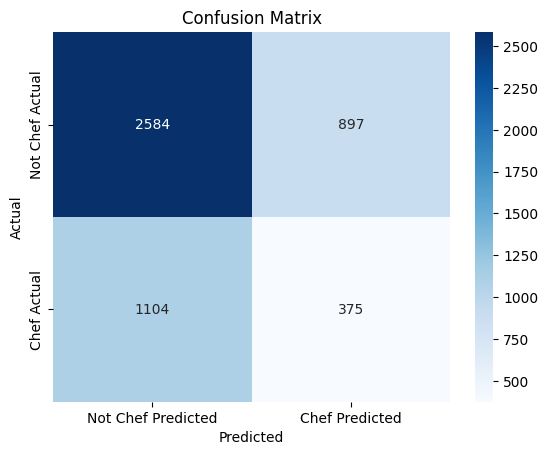

In [66]:
print(compute_metrics(y[split:], preds))
plot_confusion_matrix(y[split:], preds)

# BART

In [67]:
test_data = final_data.copy()
text = test_data['description'].tolist()
split = int(len(text)*0.8)
text = text[split:]
y = final_data['link'].apply(lambda x: 1 if x == 'chef' else 0).values.tolist()


In [68]:
# We import the BART Model which is a pretrained zero-shot classifier model
classifier = transformers.pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
sequence_to_classify = text
# We give the model the classes that we want to classify into
candidate_labels = ["chef", "not chef"]
output = classifier(sequence_to_classify, candidate_labels, multi_label=False)
print(output)

In [40]:
def get_labels(output):
    labels = []
    for prediction in output:
        label = prediction['labels'][0]
        labels.append(label)
    return labels

lab = get_labels(output)

# Convert the predictions into encoding
label_mapping = {'not chef': 0, 'chef': 1}
labels =  list(map(lambda x: label_mapping[x], lab))
print(labels)

[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

{'accuracy': 0.3465725806451613, 'f1': 0.4584795321637427}


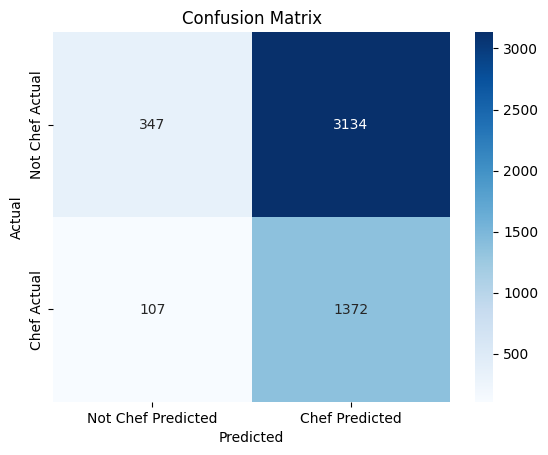

In [41]:
print(compute_metrics(y[split:], labels))
plot_confusion_matrix(y[split:], labels)